## Hoja de trabajo No.2 
### Modelación y Simulación
- Paola De León 20361
- Gabriela Contreas 20213

#### Task 1 - Teoría

**TASK 1.1**

1. Cómo definiría “Programación Lineal”?
    - La programación lineal es un proceso poer medio del cual se maximiza una función lineal, en donde se trata de encontrar los valores optimos para cada una de las varibales. Cabe destacar que esta es capaz de realizar la optimización por meido de una funcion objetivo y restricciones las cuales se deben de cumplir al momento de optimizar dicha funcion.
    
2. ¿Cuáles son los escenarios típicos y los problemas del mundo real que se pueden modelar mediante la programación lineal?
    - Esta es aplicada en en el mundo empresarial para resolver problemas de planificación, asignación de recursos y toma de decisiones

3. ¿Cómo contribuye la programación lineal a la toma de decisiones en diversas industrias, como la fabricación, el transporte, las finanzas y la asignación de recursos?
    - xxx

**TASK 1.2**

1. ¿Cómo definiría los componentes clave de un problema de programación lineal: función objetivo, variables de decisión y restricciones?
    - xxx

2. ¿Cómo se formula matemáticamente un problema de programación lineal?
    - xxx

3. ¿Cuál es la interpretación geométrica de un problema de programación lineal en dos dimensiones?
    - xxx

4. ¿Cómo se relacionan las regiones factibles, las soluciones óptimas y los puntos de esquina en la programación lineal?
    - xxx

5. ¿Qué es el método gráfico y cuándo es adecuado para resolver problemas de programación lineal?
    - xxx 

#### Task 2 - Ejercicios prácticos

#### Task 2.1
**Restricciones**
- Mano de Obra = 2x_a + 4x_b <= 100
- Materia prima = 3x_a + 2x_b <= 120
- No Negatividad = x_a,x_b >= 0

Cantidad de producto A a producir: 35.0
Cantidad de producto B a producir: 7.5
Ganancia total: $ 462.5


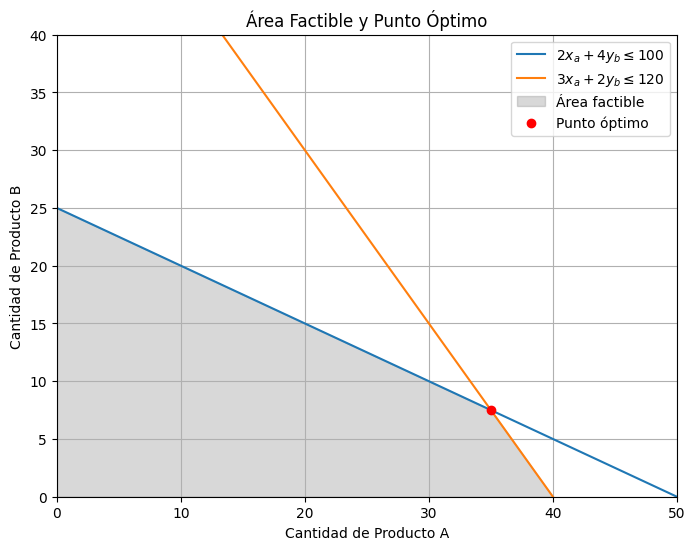

In [12]:
from pulp import LpMaximize, LpProblem, LpVariable
import numpy as np
import matplotlib.pyplot as plt


prob = LpProblem("Maximisar Ganancia", LpMaximize)

Horas_A = 2
Horas_B = 4
Material_A = 3
Material_B = 2
Ganancia_A = 10
Ganancia_B = 15
Horas = 100
Unidades = 120


x = LpVariable("Unidades_ProductoA", lowBound=0)
y = LpVariable("Unidades_ProductoB", lowBound=0)

#Func. Objetivo
prob += Ganancia_A * x + Ganancia_B * y, "Ganancia Max"

# Restricciones
prob += Horas_A * x + Horas_B * y <= 100, "Mano de obra"
prob += Material_A * x + Material_B * y <= 120, "Material"

prob.solve()

print("Cantidad de producto A a producir:", x.varValue)
print("Cantidad de producto B a producir:", y.varValue)
print("Ganancia maxima: $", Ganancia_A * x.varValue + Ganancia_B * y.varValue)

# Restricciones
x_vals = np.linspace(0, 50, 100)
y2_vals = (Unidades - Material_A * x_vals) / Material_B # Material
y1_vals = (Horas - Horas_A * x_vals) / Horas_B # Mano de obra

# --- PARA ESTA PARTE SE SOLICITO AYUDA A CHATGPT ---
# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1_vals, label=r"$2x_a + 4y_b \leq 100$")
plt.plot(x_vals, y2_vals, label=r"$3x_a + 2y_b \leq 120$")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0, 50)
plt.ylim(0, 40)
plt.fill_between(x_vals, np.minimum(y1_vals, y2_vals), where=(y1_vals >= 0) & (y2_vals >= 0), color='gray', alpha=0.3, label='Área factible')

# Punto óptimo
plt.plot(x.varValue,  y.varValue, 'ro', label='Punto óptimo')

plt.xlabel('Cantidad de Producto A')
plt.ylabel('Cantidad de Producto B')
plt.title('Área Factible y Punto Óptimo')
plt.legend()
plt.grid()
plt.show()

**Interpretación**
- ss

#### Task 2.2


#### Task 2.3

**Restricciones**
- Mano de Obra = 3x_a + 2x_b + 4x_c <= 100
- Materia prima = 2x_a + 1x_b + 3x_c <= 120
- Tiempo de maquina = 4a_x + 3x_b + 6x_c <= 150
- No Negatividad = x_a,x_b,x_c >= 0

In [14]:
M_A = 2
O_A = 3
TM_A= 4
Precio_UA = 300
Costo_UA = 100

M_B = 1
O_B = 2 
TM_B= 3
Precio_UB = 500
Costo_UB = 200


M_C = 3
O_C = 4
TM_C= 6
Precio_UC = 700
Costo_UC = 200

prob = LpProblem("Maximisar Ganancia", LpMaximize)
x = LpVariable("Product_A_units", lowBound=0)
y = LpVariable("Product_B_units", lowBound=0)
z = LpVariable("Product_C_units", lowBound=0)

#Func. Objetivo
prob += Precio_UA * x + Precio_UB * y + Precio_UC * z , "Ganancia Max"

# Restricciones
prob += O_A * x + O_B * y + O_C * z <= 100, "Mano de obra"
prob +=  M_A * x + M_B * y + M_C * z <= 120, "Material"
prob +=  TM_A * x + TM_B * y + TM_C * z <= 120, "Tiempo por maquina"

prob.solve()

Ganancia_A = Precio_UA - Costo_UA
Ganancia_B = Precio_UB - Costo_UB
Ganancia_C = Precio_UC - Costo_UC
print("Cantidad de producto A a producir:", x.varValue)
print("Cantidad de producto B a producir:", y.varValue)
print("Cantidad de producto C a producir:", z.varValue)
print("Ganancia total: $", Ganancia_A * x.varValue + Ganancia_B * y.varValue + Ganancia_C * z.varValue )

Cantidad de producto A a producir: 0.0
Cantidad de producto B a producir: 40.0
Cantidad de producto C a producir: 0.0
Ganancia total: $ 12000.0


c:\Users\Contreras GP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


**Interpretación**